In [3]:
import numpy as np 
import pandas as pd 
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
#Reading data from CSV file
glass_df = pd.read_csv("glass.csv")
glass_df


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
#Assinging values to x and y
X = glass_df.iloc[:, :-1].values
y = glass_df.iloc[:, -1].values

In [8]:
#splitting data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [12]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.28      0.89      0.42         9
           2       0.40      0.11      0.17        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.67      1.00      0.80         6

    accuracy                           0.37        43
   macro avg       0.22      0.33      0.23        43
weighted avg       0.33      0.37      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  0  0  2]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [13]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.27      0.89      0.41         9
           2       0.29      0.11      0.15        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.35        43
   macro avg       0.23      0.30      0.23        43
weighted avg       0.30      0.35      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 1  0  0  0  0  5]]
accuracy is 0.3488372093023256


In [14]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
#print(round(accuracy_score(y_pred,y_test)*100))

              precision    recall  f1-score   support

           1       0.28      1.00      0.44         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.50      0.50      0.50         2
           7       0.75      1.00      0.86         6

    accuracy                           0.40        43
   macro avg       0.42      0.50      0.41        43
weighted avg       0.23      0.40      0.27        43

[[ 9  0  0  0  0  0]
 [17  0  0  0  1  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  1  0  1]
 [ 1  0  0  0  1  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.3953488372093023


In [21]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
accuracy is 0.20930232558139536


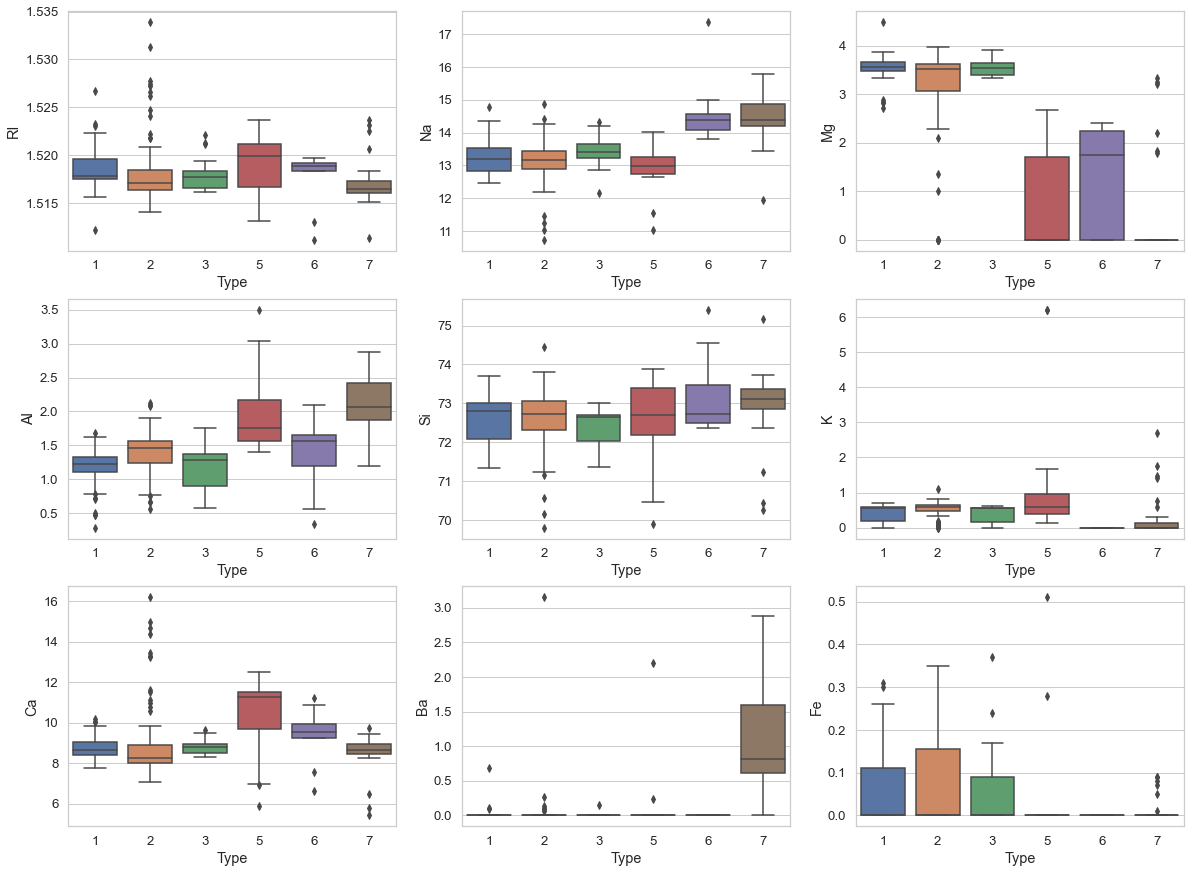

In [22]:
#using boxplot to visualize distributions
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_df)
plt.show()

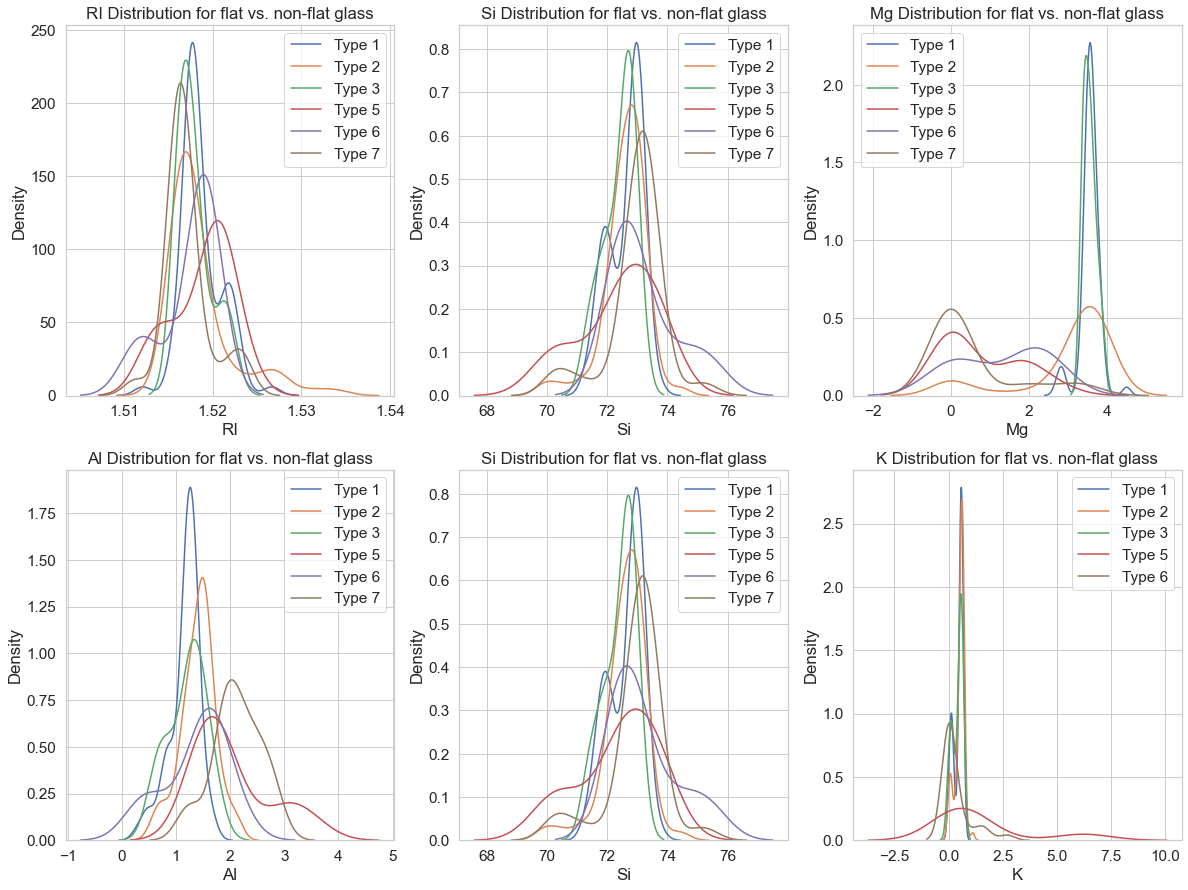

In [39]:
# Using Kernel Distribution Estimation Plot to depict the probability density function of the continuous or non-parametric
#data variables
sns.set(style="whitegrid", font_scale=1.4)
plt.subplots(figsize = (20,15))
plt.subplot(2,3,1)
sns.kdeplot(glass_df["RI"][glass_df.Type == 1], shade = False)
sns.kdeplot(glass_df["RI"][glass_df.Type == 2], shade = False)
sns.kdeplot(glass_df["RI"][glass_df.Type == 3], shade = False)
sns.kdeplot(glass_df["RI"][glass_df.Type == 5], shade = False)
sns.kdeplot(glass_df["RI"][glass_df.Type == 6], shade = False)
sns.kdeplot(glass_df["RI"][glass_df.Type == 7], shade = False)

plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3','Type 5','Type 6','Type 7'])
plt.subplot(2,3,2)
sns.kdeplot(glass_df["Si"][glass_df.Type == 1], shade = False)
sns.kdeplot(glass_df["Si"][glass_df.Type == 2], shade = False)
sns.kdeplot(glass_df["Si"][glass_df.Type == 3], shade = False)
sns.kdeplot(glass_df["Si"][glass_df.Type == 5], shade = False)
sns.kdeplot(glass_df["Si"][glass_df.Type == 6], shade = False)
sns.kdeplot(glass_df["Si"][glass_df.Type == 7], shade = False)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3','Type 5','Type 6','Type 7'])
plt.subplot(2,3,3)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 1], shade = False)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 2], shade = False)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 3], shade = False)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 5], shade = False)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 6], shade = False)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 7], shade = False)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3','Type 5','Type 6','Type 7'])
plt.subplot(2,3,4)
sns.kdeplot(glass_df["Al"][glass_df.Type == 1], shade = False)
sns.kdeplot(glass_df["Al"][glass_df.Type == 2], shade = False)
sns.kdeplot(glass_df["Al"][glass_df.Type == 3], shade = False)
sns.kdeplot(glass_df["Al"][glass_df.Type == 5], shade = False)
sns.kdeplot(glass_df["Al"][glass_df.Type == 6], shade = False)
sns.kdeplot(glass_df["Al"][glass_df.Type == 7], shade = False)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3','Type 5','Type 6','Type 7'])
plt.subplot(2,3,5)
sns.kdeplot(glass_df["Si"][glass_df.Type == 1], shade = False)
sns.kdeplot(glass_df["Si"][glass_df.Type == 2], shade = False)
sns.kdeplot(glass_df["Si"][glass_df.Type == 3], shade = False)
sns.kdeplot(glass_df["Si"][glass_df.Type == 5], shade = False)
sns.kdeplot(glass_df["Si"][glass_df.Type == 6], shade = False)
sns.kdeplot(glass_df["Si"][glass_df.Type == 7], shade = False)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3','Type 5','Type 6','Type 7'])
plt.subplot(2,3,6)
sns.kdeplot(glass_df["K"][glass_df.Type == 1], shade = False)
sns.kdeplot(glass_df["K"][glass_df.Type == 2], shade = False)
sns.kdeplot(glass_df["K"][glass_df.Type == 3], shade = False)
sns.kdeplot(glass_df["K"][glass_df.Type == 5], shade = False)
sns.kdeplot(glass_df["K"][glass_df.Type == 6], shade = False)
sns.kdeplot(glass_df["K"][glass_df.Type == 7], shade = False)

plt.title("K Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 5','Type 6','Type 7'])

In [ ]:
#Which algorithm you got better accuracy? Can you justify why?

#Out of all algorithms Complement Naive Bayes has the maximum accuracy. This algorithm is well suited for imbalanced datasets.